Sólo figuras aquí, todos los cálculos serios en el otro notebook please.

In [33]:
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib[:rcParams][:"svg.image_noscale"]=false

false

In [3]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    longitud=abs(xuno-xdos)
    m=(ydos-yuno)/(xdos-xuno)
    xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
    yresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        yresult[j]=round(Int,yuno+(j-1)*m)
    end
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

In [5]:
LFPSaturado=load("LFPDesaturado_3R7.jld", "LFPSaturados")
LFPPlanchado=load("LFPDesaturado_3R7.jld", "LFPDenoized")

Dict{AbstractString,Array{T,N}} with 3 entries:
  "Trancazo_2" => 64x64x248 Array{Float64,3}:…
  "Trancazo_1" => 64x64x248 Array{Float64,3}:…
  "Trancazo_3" => 64x64x248 Array{Float64,3}:…

In [35]:
tmax=248

248

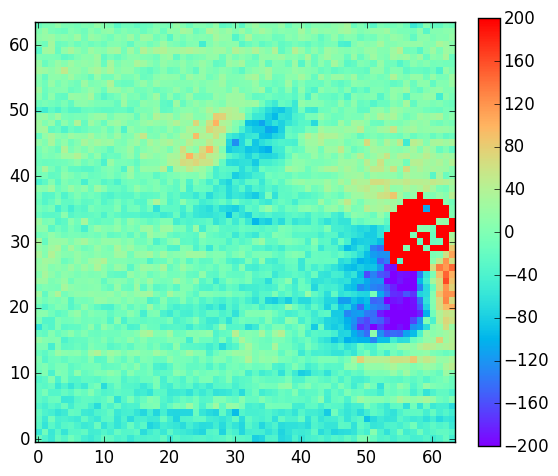

PyObject <matplotlib.colorbar.Colorbar object at 0x7f691828b5c0>

In [19]:
ion()
limites=200
figure(figsize=(6,6))

exdesaturado=LFPPlanchado["Trancazo_2"][:,:,120];
imagen=imshow(exdesaturado, origin="lower", interpolation="nearest", cmap="rainbow", vmin=-limites,vmax=limites)
cb=colorbar(imagen, fraction=0.046)

In [31]:
puntox=[40,44,48,52,56, 60]
puntoy=[28,25,22,18,15, 12]
#=
puntoy=puntoy+3
puntol=["F","E", "D", "C", "B","A"];
primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
=#
(muchasx,muchasy)=ListaPixelesdeLinea([40,60],[28,12])
length(muchasx)

21

In [30]:
muchasx

21-element Array{Int64,1}:
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50
 51
 52
 53
 54
 55
 56
 57
 58
 59
 60

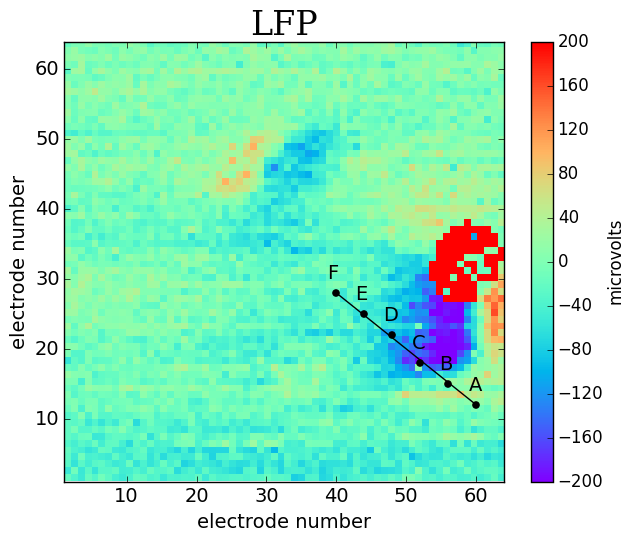

PyObject <matplotlib.text.Text object at 0x7f6918029cf8>

In [32]:
ion()
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>24)

title("LFP", fontdict=font1)
limites=200
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

for punto in 1:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(-5,10), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="rainbow", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

scatter(puntox,puntoy, marker="o", s=20, c="black")

#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([40, 60], [28, 12], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("microvolts")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

#savefig("LFP_Recorded_With_Electrodes-$t.svg", dpi=90)

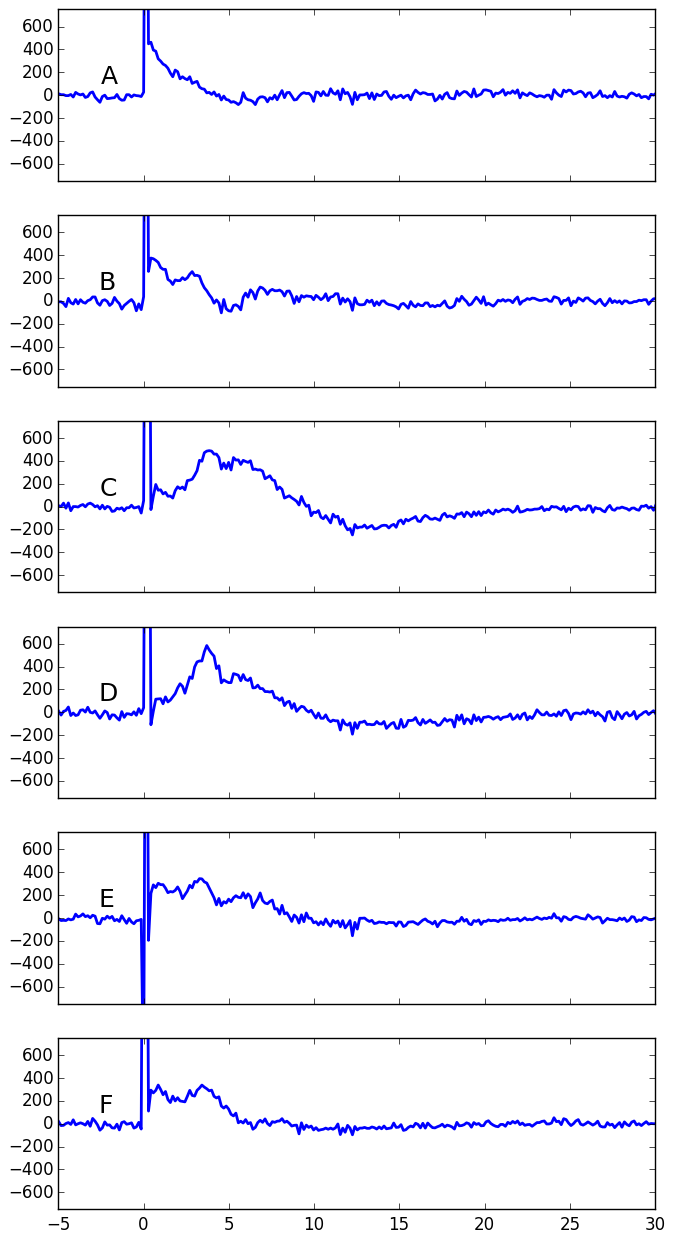

In [58]:
tiempo=1:tmax
t=700

farofa, lista=subplots(6, sharex=true, sharey=true, figsize=(7.7,6*2.5))

for j=1:6
    PyPlot.xlim(-5,30)
    PyPlot.ylim(-750,750)
    lista[j][:plot]((tiempo-36)/7.022,vec(LFPPlanchado["Trancazo_2"][puntoy[7-j],puntox[7-j],tiempo]),
    linewidth=2.0)
    lista[j][:annotate](puntol[7-j],xy=(-2.5,100), annotation_clip=false, fontsize=18)
end
savefig("PotencialesEvocadosSelectos_3R7-2.svg", dpi=96)

In [83]:
arregloparacascadaLFP=zeros(length(muchasx),tmax);
for j in 1:length(muchasx)
    arregloparacascadaLFP[j,:]=LFPPlanchado["Trancazo_2"][muchasx[j],muchasy[j],:]
end

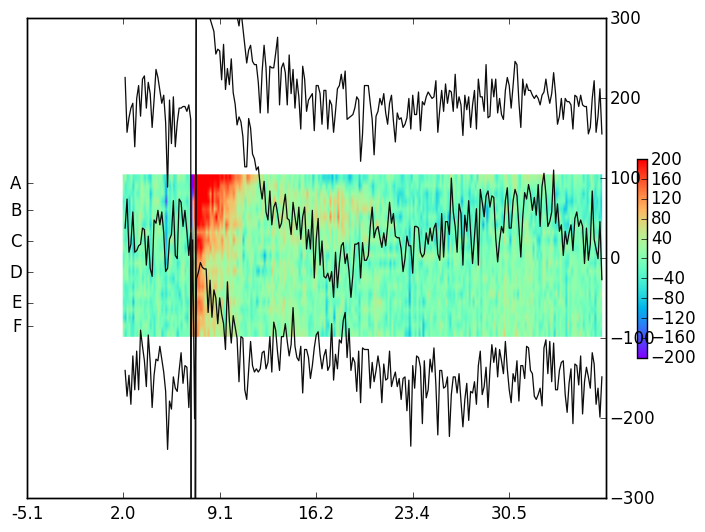

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6917c7be48>

In [109]:
limites=200
fag, gaf=subplots(figsize=(8,6))
#The density plot
gaf[:set_xlim](1,tmax)
gaf[:set_ylim](20.5,0)
imagen=gaf[:imshow](arregloparacascadaLFP, cmap="rainbow", vmin=-limites, vmax=limites)
tiempoestampas=gaf[:axes][:get_xticks]()
#=
gaf[:plot]([0,351],[21,21], "k-", lw=2)
gaf[:annotate]("50ms", (30.5,23))
gaf[:plot]([0,0],[21,2.73], "k-", lw=2)
gaf[:annotate]("1mm", (0,14))


#Some vertical lines
gaf[:plot]([300,300],[22,0], "k-", lw=3)
gaf[:plot]([400,400],[22,0], "k-", lw=3)
gaf[:plot]([500,500],[22,0], "k-", lw=3)
gaf[:plot]([700,700],[22,0], "k-", lw=3)
gaf[:plot]([800,800],[22,0], "k-", lw=3)
gaf[:plot]([900,900],[22,0], "k-", lw=3)

gaf[:annotate]("0", (300,23))
gaf[:annotate]("14", (400,23))
gaf[:annotate]("28", (500,23))
gaf[:annotate]("42", (700,23))
gaf[:annotate]("58", (800,23))
gaf[:annotate]("72", (900,23))

=#
#adjust aspcet ratioo
gaf[:axes][:set_aspect](4)
map!(x->round((x-36)/7.0224,1), tiempoestampas)
gaf[:axes][:set_xticklabels](tiempoestampas)
gaf[:set_yticks]([19,16,12,8,4,0.5])
gaf[:set_yticklabels](puntol)


#colorbar
cbx=colorbar(imagen, fraction=0.016)

#the traces over the plot
ga2 = gaf[:twinx]()
ga2[:set_ylim](-300,300)

#ga2[:plot](1:1300, vec(arregloparacascada[19,1:1300])-200, "-", linewidth=0.2, color="0.25")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[8,1:tmax])-140, "-", linewidth=0.92, color="0.05")
#ga2[:plot](1:1300, vec(arregloparacascada[12,1:1300])-20, "-", linewidth=0.2 , color="0.25")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[1,1:tmax])+40, "-", linewidth=0.92, color="0.05")
#ga2[:plot](1:1300, vec(arregloparacascada[4,1:1300])+120, "-", linewidth=0.2, color="0.25")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[2,1:tmax])+200, "-", linewidth=0.92,color="0.05")
#=
ga2[:plot]([1300,1300],[-200,0], "k-", lw=2)
ga2[:annotate]("200µm", (1200,-100))


ga2[:set_xlim](1,1300)
=#
#ga2[:set_ylim](-300,300)

In [74]:
size(arregloparacascadaLFP)

(21,248)

In [104]:
vec(arregloparacascadaLFP[16,1:tmax])

248-element Array{Float64,1}:
  -2.01416
 -32.2266 
 -34.2407 
  -8.05664
   8.05664
 -28.1982 
   6.04248
  22.1558 
  18.1274 
  12.085  
   4.02832
  34.2407 
   4.02832
   ⋮      
  12.085  
  16.1133 
   0.0    
 -16.1133 
  32.2266 
 -38.269  
   4.02832
  14.0991 
 -42.2974 
 -20.1416 
   2.01416
  38.269  

In [82]:
vec(LFPPlanchado["Trancazo_2"][44,25,:])

248-element Array{Float64,1}:
 -22.1558 
 -22.1558 
 -12.085  
 -72.5098 
  -4.02832
 -48.3398 
  -8.05664
   8.05664
   0.0    
  26.1841 
  -4.02832
 -30.2124 
  16.1133 
   ⋮      
 -14.0991 
 -20.1416 
 -28.1982 
 -36.2549 
 -42.2974 
  12.085  
 -18.1274 
 -36.2549 
 -54.3823 
 -42.2974 
 -24.1699 
 -74.5239 

In [81]:
muchasx[5],muchasy[5]

(44,25)